# Window Functions 


In the previous module, you learnt how to order employees by their salary in an example data set using group by & limits. One method to do this would be to categorise them by their values. For example, you can divide them into the following categories:

Employees earning less than ₹2,50,000 per year
Employees earning greater than or equal to ₹2,50,000 per year


The first category of employees would be exempted from paying any tax and need not go through some of the additional checks that the second category of employees would be required to go through. You can solve this problem statement using a filter condition in a 'where' clause.



Now, imagine you are working in a bank and need to identify and classify your customers on the following criteria:

* Top 10% of customers: Platinum
* Next 10% of customers: Gold
* Next 20% of customer: Silver
* Rest of the customers: Regular


Your bank intends to roll out different schemes for these classes of customers in exchange for their loyalty. But how do you solve such a seemingly complex problem statement? You will find the answer to this question in the upcoming sessions.


In this session

You will be introduced to the concept of windowing functions. You will learn about the **'over'** and **'partition'** clauses used to implement windowing. After going through this session, you should be able to use window functions such as **rank()**, **dense_rank()** and **percent_rank()** in your queries.

You will also be introduced to the concept of **named windows**. You will learn about **frames** and how they move within a window. Next, you will learn about the various applications of windowing, including one to calculate an element known as a **moving average**. Finally, you will learn about the **'lead'** and **'lag'** functions that are used to fetch data from succeeding and preceding rows, respectively.

## Rank Functions 

* **RANK():** Rank of the current row within its partition, with gaps
* **DENSE_RANK():** Rank of the current row within its partition, without gaps
* **PERCENT_RANK():** Percentage rank value, which always lies between 0 and 1

### rank()


    Syntax 
    
    RANK() OVER (
    
    PARTITION BY [{,...}]
    
    ORDER BY  [ASC|DESC], [{,...}]
    
    )

 **Create Table** 

    -- Create the table
    CREATE TABLE sales (
        id INT PRIMARY KEY,
        employee VARCHAR(50),
        department VARCHAR(10),
        amount DECIMAL(10, 2),
        sale_date DATE
    );
    
    -- Insert the data
    INSERT INTO sales (id, employee, department, amount, sale_date) VALUES
    (1, 'Alice', 'A', 100, '2023-01-01'),
    (2, 'Bob', 'A', 200, '2023-01-02'),
    (3, 'Carol', 'B', 300, '2023-01-01'),
    (4, 'Alice', 'A', 400, '2023-01-03'),
    (5, 'Bob', 'A', 100, '2023-01-04'),
    (6, 'Carol', 'B', 500, '2023-01-02');







**Example1:**

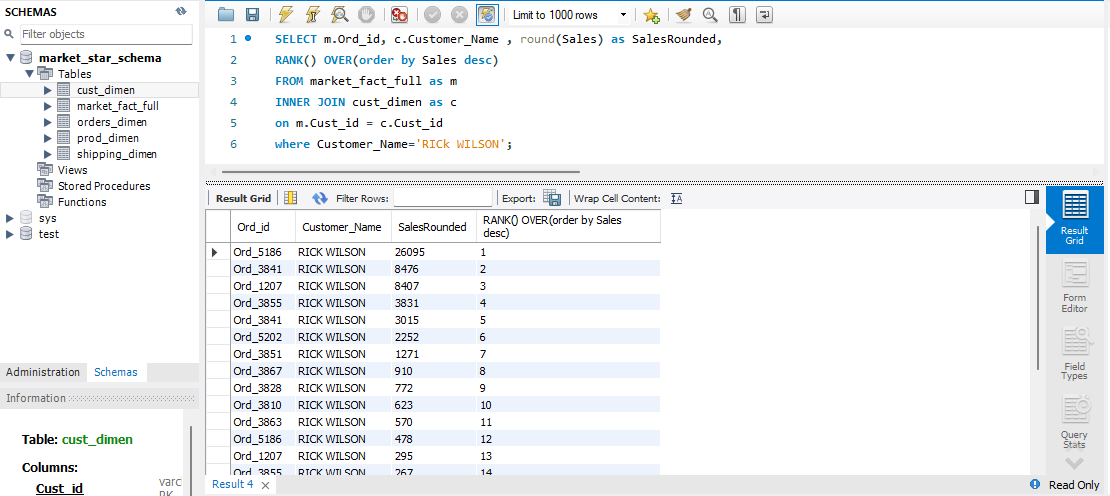

    SELECT m.Ord_id, c.Customer_Name , round(Sales) as SalesRounded, 
    RANK() OVER(order by Sales desc)
    FROM market_fact_full as m 
    INNER JOIN cust_dimen as c 
    on m.Cust_id = c.Cust_id 
    where Customer_Name='RICk WILSON';
    
### WITH clause
**Example3:** Top 10 sales order from a customer

    WITH sales_info AS (
    SELECT m.Ord_id, c.Customer_Name , 
    round(Sales) as SalesRounded, 
    RANK() OVER(order by Sales desc) as sales_rank
    FROM market_fact_full as m 
    INNER JOIN cust_dimen as c 
    on m.Cust_id = c.Cust_id 
    where Customer_Name='RICk WILSON') 
    select * 
    from sales_info 
    where sales_rank<=10;

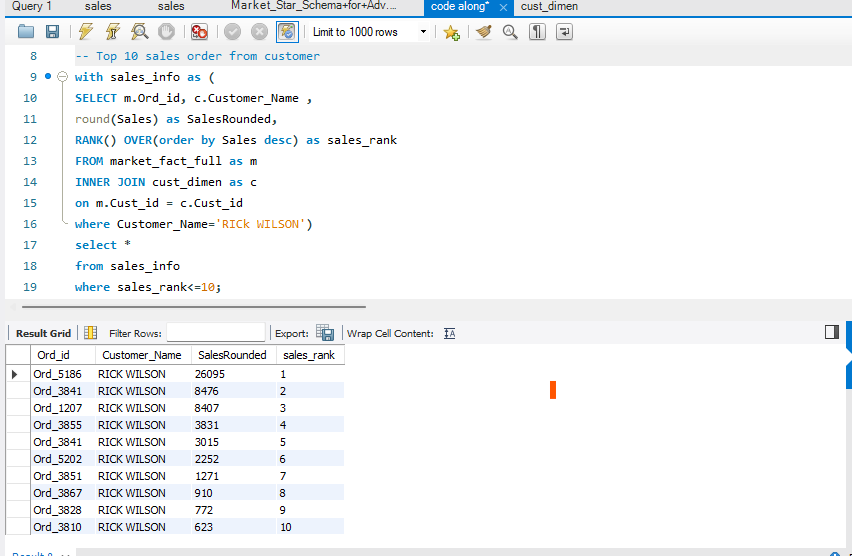

**Question :**

Given a table named products with the following columns.

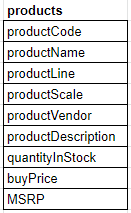


Write a query to retrieve the ranks of the products in decreasing order of their quantities in stock.


Sample Output

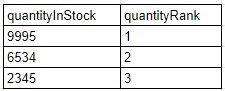

    select quantityInStock, rank() over ( order by quantityInStock desc ) as quantityRank from products ;

### DENSE_RANK(): 

    DENSE_RANK() OVER (
    
      PARTITION BY <expression>[{,<expression>...}]
    
      ORDER BY <expression> [ASC|DESC], [{,<expression>...}]
    
    )


### Rank vs Dense Rank 
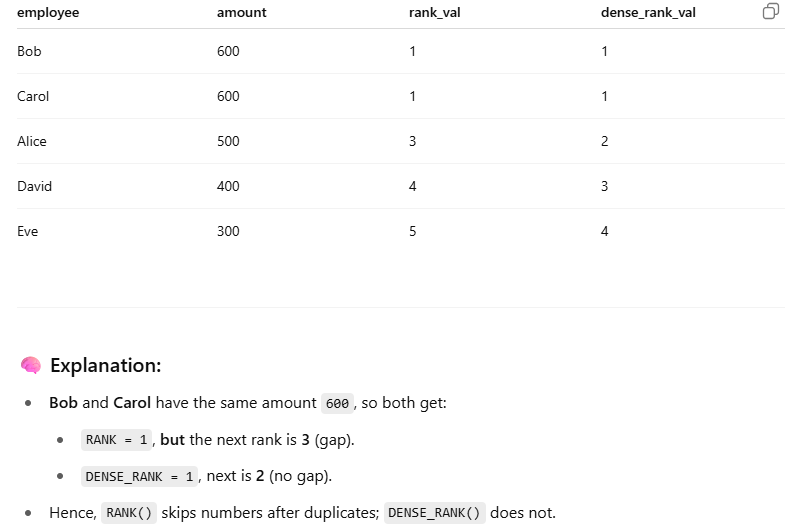

    SELECT
      employee,
      amount,
      RANK() OVER (ORDER BY amount DESC) AS rank_val,
      DENSE_RANK() OVER (ORDER BY amount DESC) AS dense_rank_val
    FROM sales;

### PERCENT_RANK(): 

Percentage rank value, which always lies between 0 and 1


PERCENT_RANK() calculates the relative rank of a row as a percentage of the total number of rows. The formula is:

    PERCENT_RANK = (RANK - 1) / (total_rows - 1)
    
    
* The **top-ranked** row gets **0.0**
* The **last row** gets **1.0**
  



> PERCENT_RANK() OVER (
> 
>PARTITION BY <expression>[{,<expression>...}]
> 
>ORDER BY <expression> [ASC|DESC], [{,<expression>...}])
>


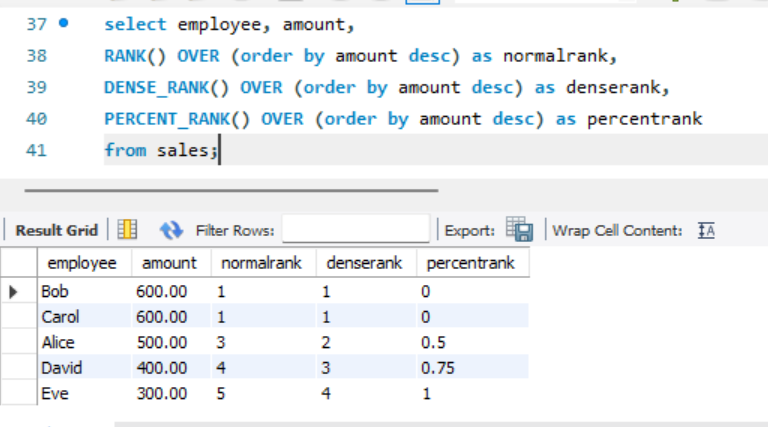

-- Top 10 sales order from customer by rank , deep rank, percent rank

-- Step 1: Create the table

    CREATE TABLE sales (
        id INT PRIMARY KEY,
        employee VARCHAR(50),
        amount DECIMAL(10, 2)
    );

-- Step 2: Insert the data

    INSERT INTO sales (id, employee, amount) VALUES
    (1, 'Alice', 500),
    (2, 'Bob', 600),
    (3, 'Carol', 600),
    (4, 'David', 400),
    (5, 'Eve', 300);

    select employee, amount, 
    RANK() OVER (order by amount desc) as normalrank,
    DENSE_RANK() OVER (order by amount desc) as denserank,
    PERCENT_RANK() OVER (order by amount desc) as percentrank
    from sales;

### ROW_NUMBER()

https://www.mysqltutorial.org/mysql-window-functions/mysql-row_number-function/


**Q:** Rank each sale within each department by the highest amount.

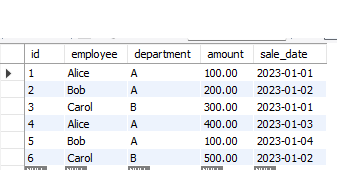

    SELECT
      employee,
      department,
      amount,
      ROW_NUMBER() OVER(PARTITION BY department ORDER BY amount DESC) AS row_num
    FROM sales;

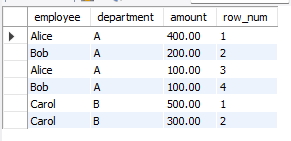

**Example-3:**

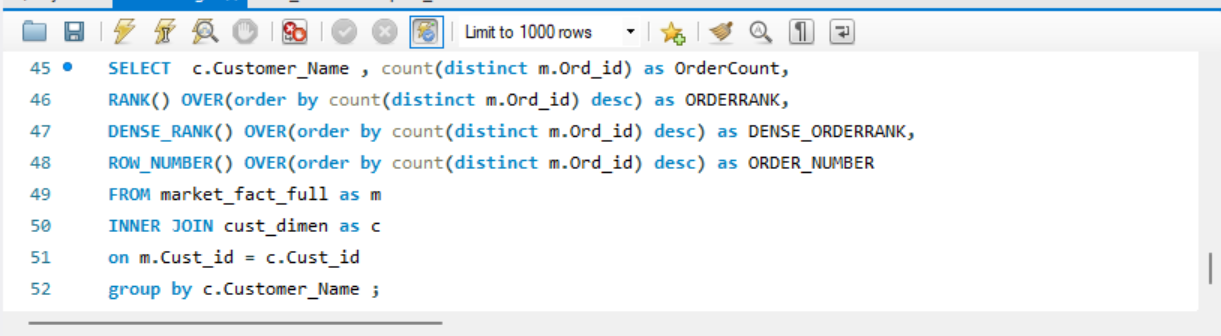

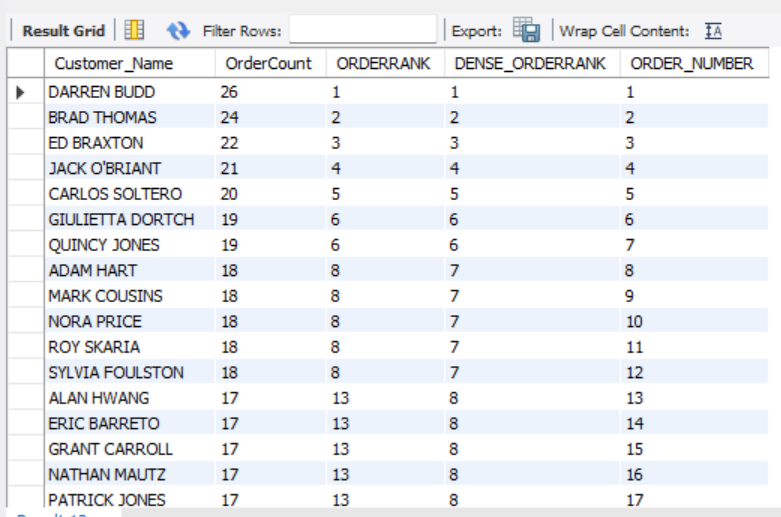

### Rank vs Rank + Partition

rank:

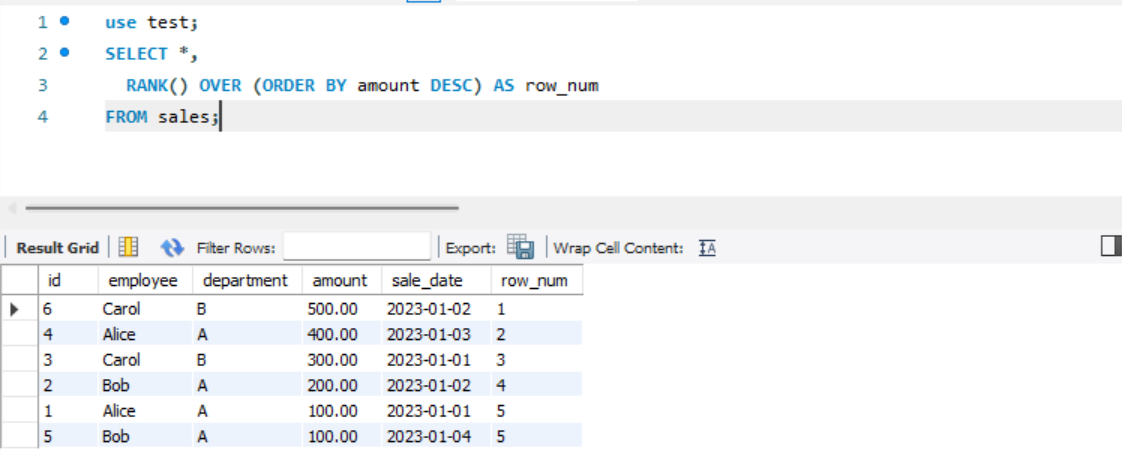

with partition

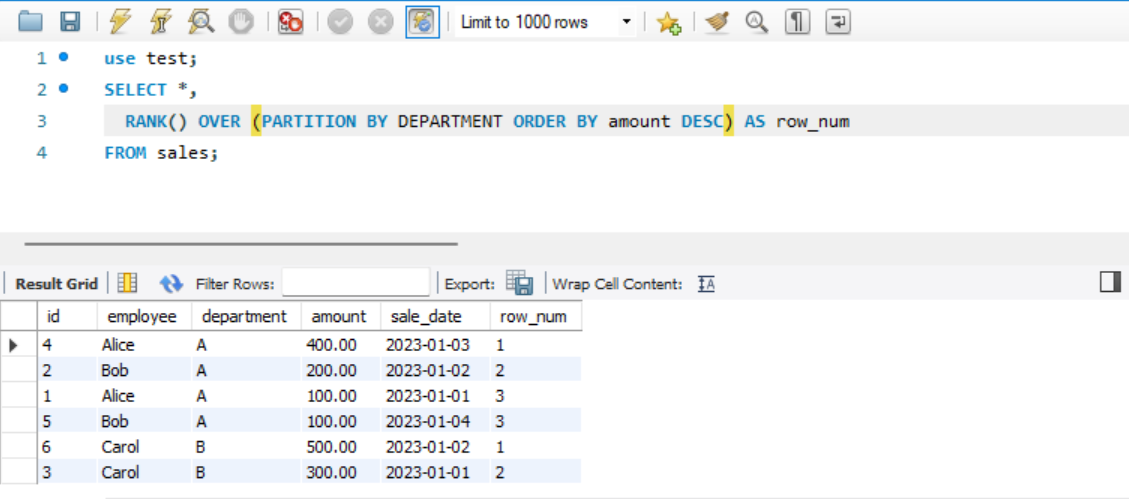


### Partitioning

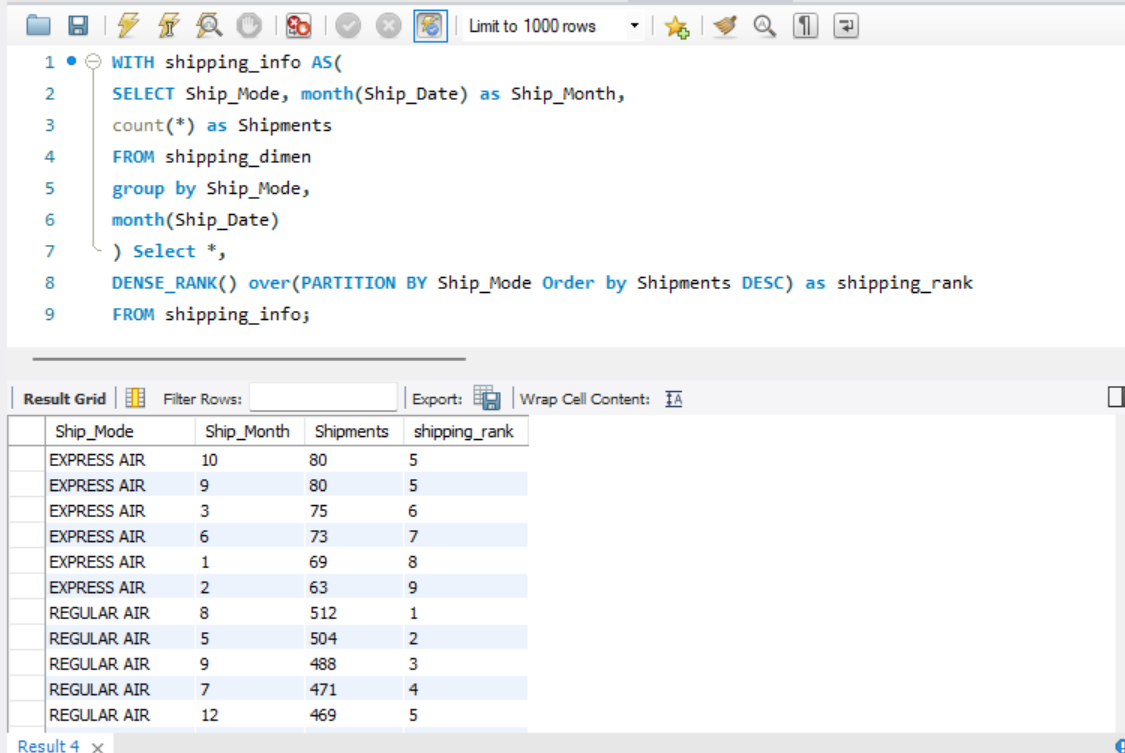



Given a table named orderdetails with the following columns



Orderdetails

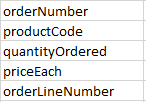

There are some orders that have multiple order amounts corresponding to the same order. Write a query to retrieve the individual and total order amounts for each order along with the order numbers. Order the values in the increasing order of the order numbers. For similar order numbers, arrange the individual order amounts in the decreasing order.


Expected Output

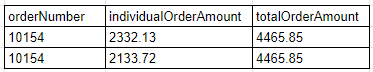





    select orderNumber, quantityOrdered * priceEach as individualOrderAmount,
    sum(quantityOrdered * priceEach) over (partition by orderNumber) as totalOrderAmount
    from orderdetails
    order by orderNumber, individualOrderAmount desc;


## Named Windows

here you saparate the clause after OVER placed in bracket (partition by orderNumber) as window 

like  WINDOW w AS (PARTITION BY orderNumber) ; and then use as RANK() over w


http://dev.mysql.com/doc/refman/8.0/en/window-functions-named-windows.html

The syntax for writing a named window is as follows:

    WINDOW window_name AS (window_spec)
    
      [, window_name AS (window_spec)] ...

The order in which the various SQL statements appear in a query is as follows: 

SELECT

FROM

JOIN

WHERE

GROUP BY

HAVING

WINDOW

ORDER 


Example:

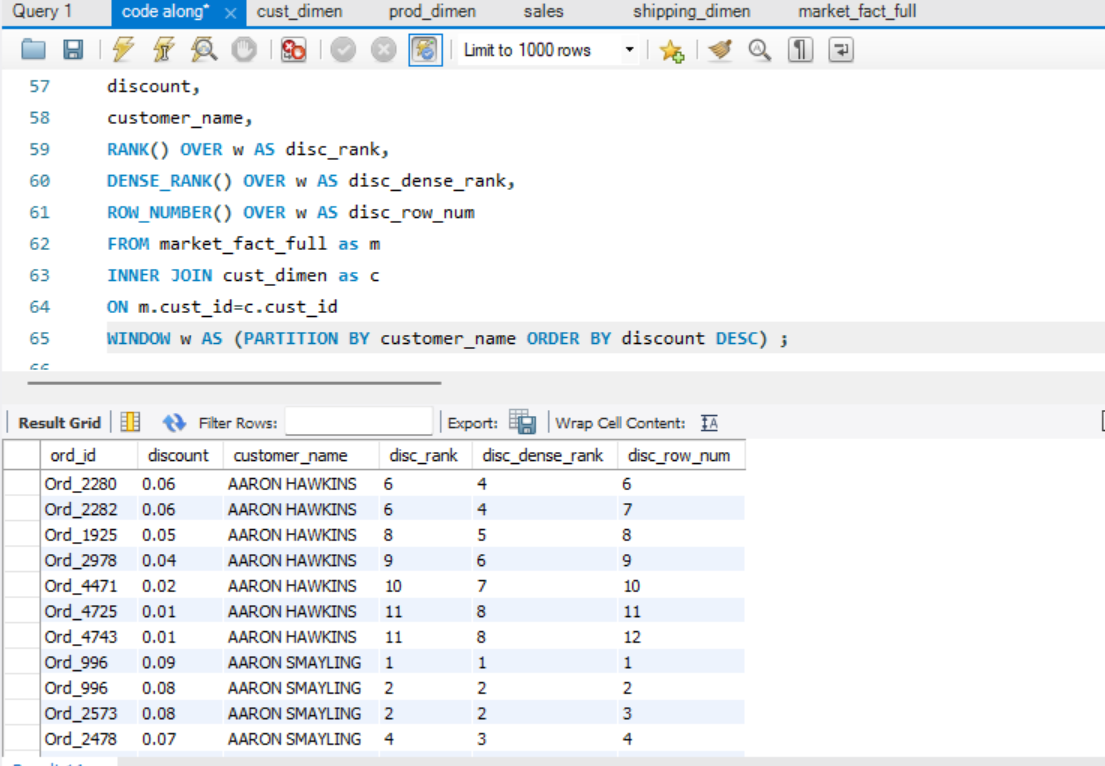

    SELECT ord_id,
    discount,
    customer_name,
    RANK() OVER w AS disc_rank,
    DENSE_RANK() OVER w AS disc_dense_rank,
    ROW_NUMBER() OVER w AS disc_row_num
    FROM market_fact_full as m
    INNER JOIN cust_dimen as c
    ON m.cust_id=c.cust_id
    WINDOW w AS (PARTITION BY customer_name ORDER BY discount DESC) ;

**Question:** Rewrite the following query using a named window:

    SELECT *,
    RANK() OVER (
      PARTITION BY ship_mode
      ORDER BY COUNT(*)) 'Rank',
    DENSE_RANK() OVER (
      PARTITION BY ship_mode
      ORDER BY COUNT(*)) 'Dense Rank',
    PERCENT_RANK() OVER (
      PARTITION BY ship_mode
      ORDER BY COUNT(*)) 'Percent Rank'
    FROM shipping_dimen;


Ans: 
**Step1:** above query is wrong as there is no group by when aggregration exists so first fix that for query to be able to run 

    SELECT  ship_mode,
    COUNT(*) AS ship_mode_count,
    RANK() OVER (PARTITION BY ship_mode ORDER BY COUNT(*))  AS 'Rank',
    DENSE_RANK() OVER (PARTITION BY ship_mode ORDER BY COUNT(*)) AS 'Dense Rank',
    PERCENT_RANK() OVER (PARTITION BY ship_mode ORDER BY COUNT(*)) AS 'Percent Rank'
    FROM shipping_dimen
    GROUP BY ship_mode;

**Step2:** The output is still vague 

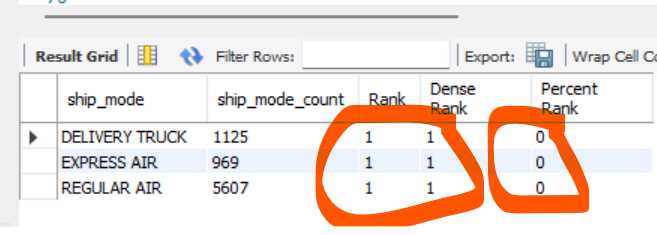

**Step3:** add named windows 

    SELECT  ship_mode,
    COUNT(*) AS ship_mode_count,
    RANK() OVER w AS 'Rank',
    DENSE_RANK() OVER w AS 'Dense Rank',
    PERCENT_RANK() OVER w AS 'Percent Rank'
    FROM shipping_dimen
    GROUP BY ship_mode
    WINDOW w AS (PARTITION BY ship_mode ORDER BY COUNT(*));


### Frames
http://dev.mysql.com/doc/refman/8.0/en/window-functions-named-windows.html

https://www.vertica.com/docs/9.2.x/HTML/Content/Authoring/SQLReferenceManual/Functions/Analytic/window_frame_clause.htm?origin_team=T02V9CHFH


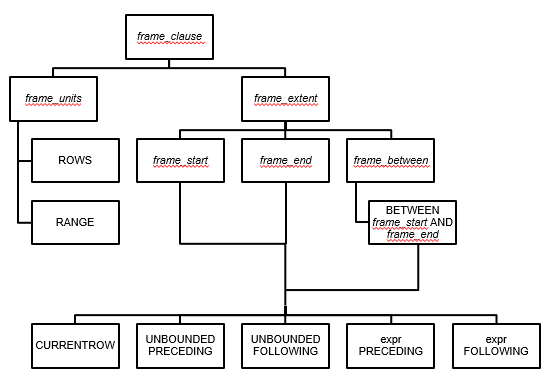

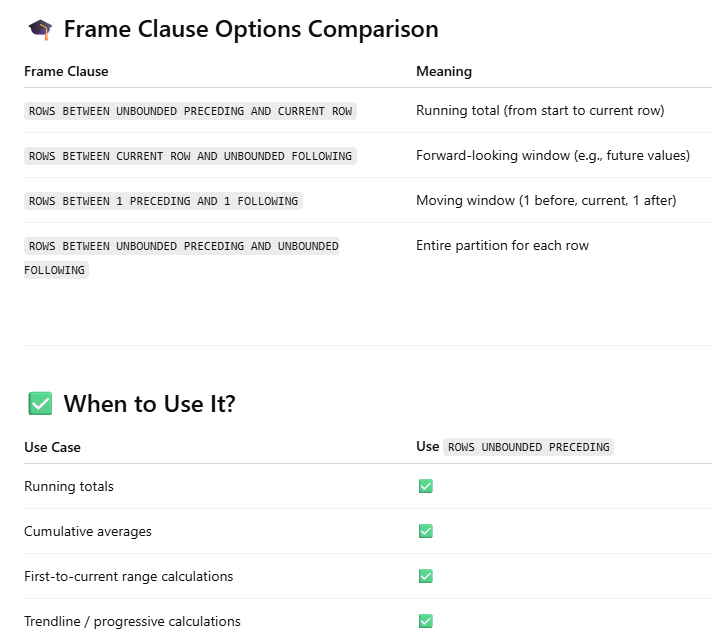

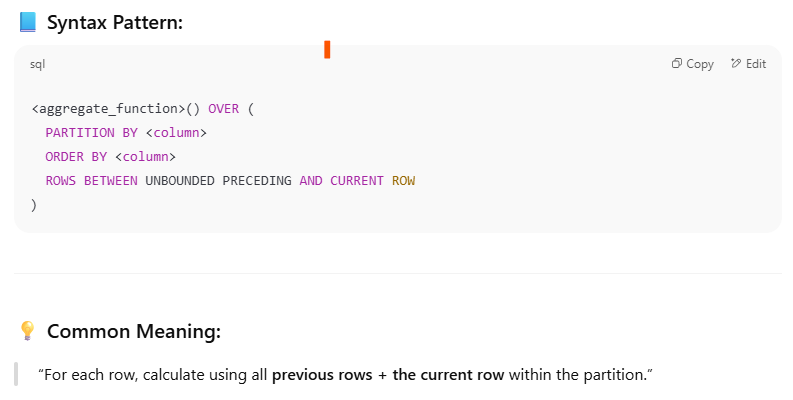

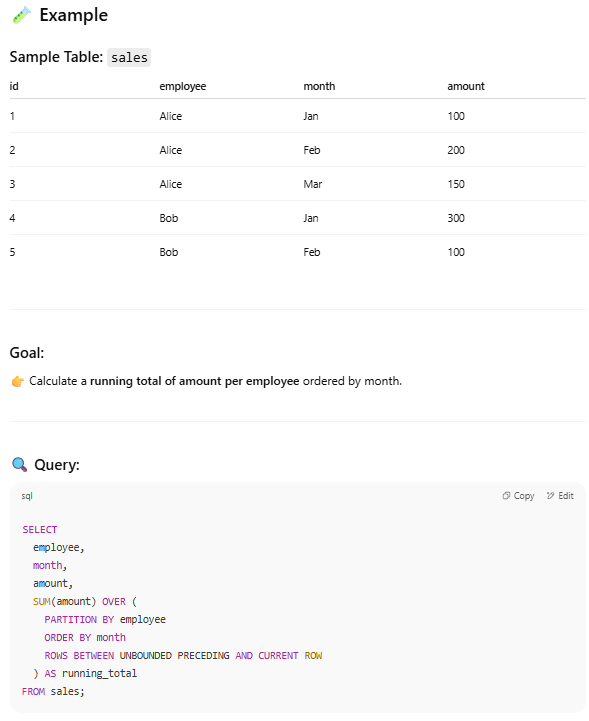

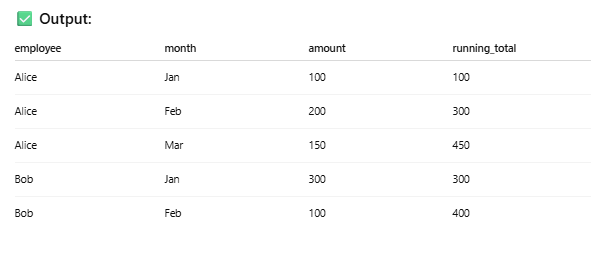


**Example:** give shiping amount total grouped by date and running total and moving avarage with 6 day freqyency

    WITH daily_shipping_summary AS (
    SELECT s.Ship_Date, SUM(m.shipping_cost) as daily_total
    FROM shipping_dimen as s 
    INNER JOIN market_fact_full as m
    ON s.Ship_id=m.Ship_id
    group by s.Ship_Date
    order by s.Ship_Date
    )
    SELECT *,
    SUM(daily_total) OVER w1 AS running_total,
    AVG(daily_total) OVER w1 AS moving_average
    From daily_shipping_summary
    WINDOW w1 as (order by ship_date ROWS UNBOUNDED PRECEDING),
    w2 as (order by ship_date ROWS 6 PRECEDING)
    ;

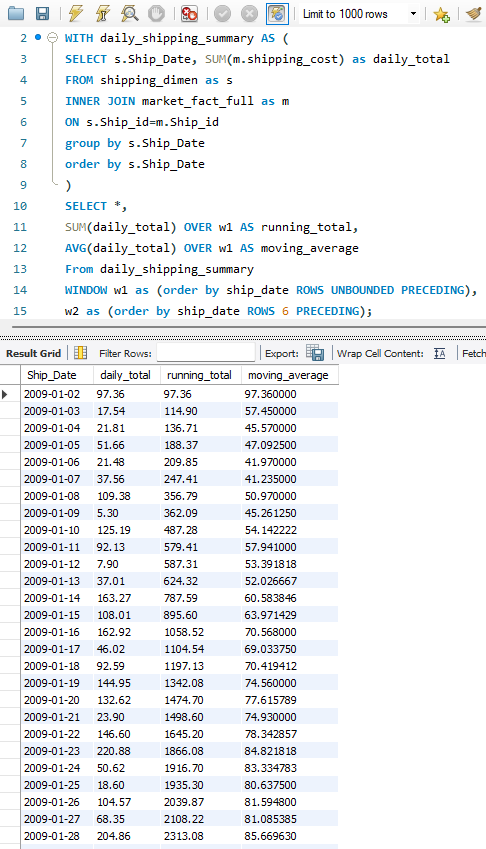


**Question:**

The table given below contains the number of runs scored by Virat Kohli over the time period 2008-2019. Add another column which displays the 5-year moving average of the number of runs scored.


**Table Name:** Kohli_Batting

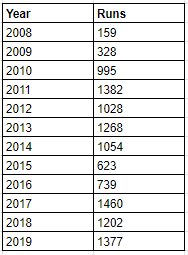
 
**Sample Output:**

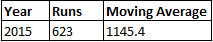

        select *, 
        avg(runs) over (order by year rows 4 preceding) as '5 Year Moving Average'
        from kohli_batting;

###  Lead and Lag Functions 

Identifying frequent customers is a commonly observed business requirement for retail chains. The 'lead' and 'lag' functions can be quite helpful in this case. You can compare the date on which a particular customer purchased an item from a store with the next date on which they ordered an item again. 

The syntax for using the 'lead' and 'lag' functions are as follows:



    LEAD(expr[, offset[, default]])
    
      OVER (Window_specification | Window_name)

    eg. **LEAD(column, offset, default_value) OVER (ORDER BY column)**

        * column: The column you want to retrieve data from
        * offset: The number of rows forward to look (default is 1)
        * default_value: The value to return if the offset goes beyond the result set

    
    LAG(expr[, offset[, default]])
            OVER (Window_specification | Window_name)


    eg. **LAG(column, offset, default_value) OVER (ORDER BY column)**

        * column: The column you want to retrieve data from
        * offset: The number of rows backward to look (default is 1)
        * default_value: The value to return if the offset goes beyond the result set


Example: Let's say we have a table of monthly sales:
**Lead**

    CREATE TABLE monthly_sales (
        month DATE,
        sales INT
    );
    
    INSERT INTO monthly_sales VALUES
    ('2023-01-01', 1000),
    ('2023-02-01', 1200),
    ('2023-03-01', 900),
    ('2023-04-01', 1500);
    
    SELECT 
        month,
        sales,
        LEAD(sales, 1, 0) OVER (ORDER BY month) AS next_month_sales
    FROM monthly_sales;


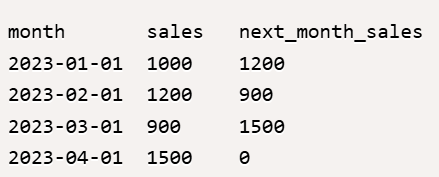

**LAG:**
The LAG function is similar to LEAD, but it accesses data from previous rows in the result set. It's useful for comparing a row's value with the value in the preceding row(s).


    SELECT 
        month,
        sales,
        LAG(sales, 1, 0) OVER (ORDER BY month) AS previous_month_sales,
        sales - LAG(sales, 1, 0) OVER (ORDER BY month) AS sales_difference
    FROM monthly_sales;

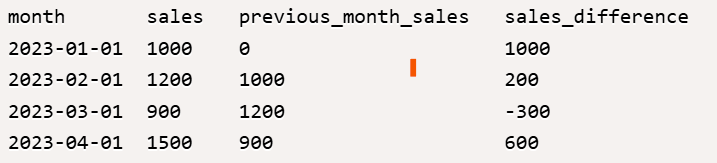

    **Example:**

          -- lead Lag
        
         With order_info as (
        	Select c.Customer_Name,
        	 m.Ord_id, 
        	 o.order_date
        	From
        		market_fact_full as m
        		LEFT JOIN orders_dimen as o on m.Ord_id=o.Ord_id 
        		LEFT JOIN cust_dimen as c on m.Cust_id = c.Cust_id 
        	WHERE 
        		c.Customer_Name = 'RICK WILSON'
        	Group By 
        		c.Customer_Name,
        		m.Ord_id, 
        		o.order_date
                )
         Select 
        	*,
        	lead(order_date,1,0) OVER (order by order_date, Ord_id) As NextOrder_Date,
        	DATEDIFF(lead(order_date,1,0) OVER (order by order_date, Ord_id),order_date) as days_diff
         From 
        	order_info;
        ; 
        
        -- alternate sql 
        
        WITH order_info AS (
            SELECT 
                c.Customer_Name,  
                m.Ord_id,   
                o.order_date  
            FROM  
                market_fact_full AS m  
                LEFT JOIN orders_dimen AS o ON m.Ord_id = o.Ord_id   
                LEFT JOIN cust_dimen AS c ON m.Cust_id = c.Cust_id  
            WHERE 
                c.Customer_Name = 'RICK WILSON'
        ),
        order_with_lead AS (
            SELECT 
                *,  
                LEAD(order_date, 1) OVER (ORDER BY order_date, Ord_id) AS NextOrder_Date
            FROM 
                order_info
        )
        SELECT 
            *,  
            DATEDIFF(NextOrder_Date, order_date) AS days_diff
        FROM 
            order_with_lead;

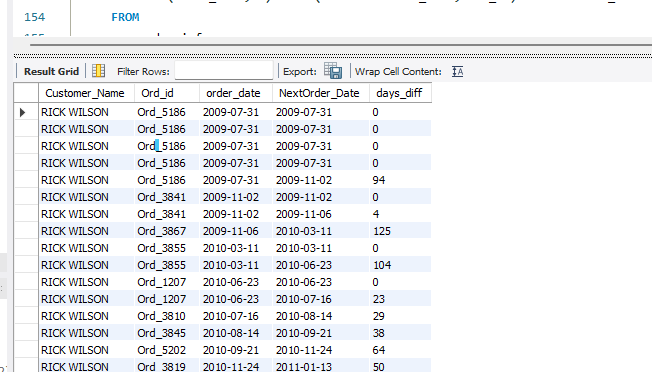


### CASE STATEMENT


WHEN condition1 THEN result1

  WHEN condition2 THEN result2

  .

  .

  WHEN conditionN THEN resultN

  ELSE result

END AS column_name;

**Example:**
    
    SELECT 
    	market_fact_id,
    	profit,
    	CASE
    		WHEN profit <-500 THEN 'Huge Loss'
    		WHEN profit BETWEEN -500 AND 0 THEN 'Bearable Loss'
    		WHEN profit BETWEEN 0 AND 500 THEN 'Decent Profit'
    		ELSE 'Great Profit'
    	END AS Profit_type
    FROM
    	market_fact_full

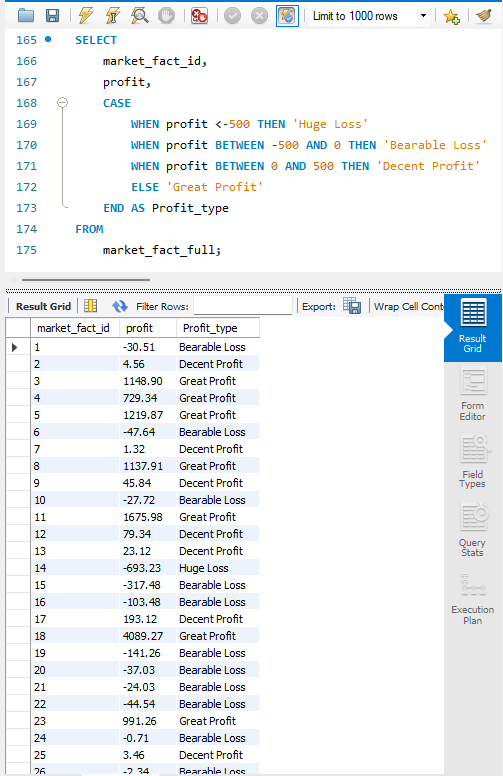

**Example**

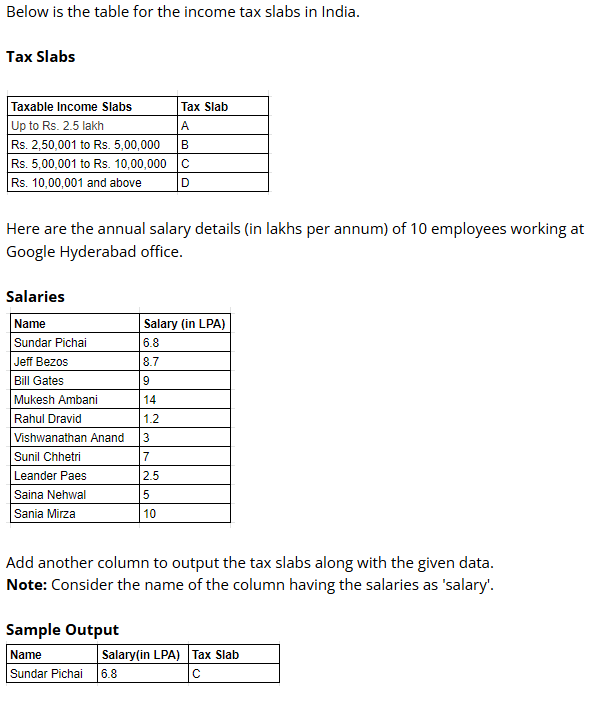

    select *,
        (case
            when salary <= 2.5 THEN 'A'
            WHEN salary  > 2.5 AND salary <= 5 THEN 'B'
            WHEN salary > 5 AND salary <=10 THEN 'C'
            when salary > 10 then 'D'
        END) AS 'Tax Slab'
    FROM salaries;

**Example 2**

-- Classify customers on the following criteria

* Top 10 % of customers as Gold
* Next 40% of customers as Silver
* Rest 50% of customers as Bronze


        WITH sales_info AS
        (select c.customer_name, 
        		round(SUM(m.Sales)) as TotalSales,
                percent_rank() over (order by round(SUM(m.Sales)) desc) as per_rank
        from
        market_fact_full as m
        left join
        cust_dimen as c
        ON m.Cust_id = c.Cust_id
        group by 
        c.Customer_Name
        )
        select *,
        case
        	when per_rank <= 0.1 THEN 'Gold'
            when per_rank > 0.1 AND per_rank <= 0.4 THEN 'Silver'
            else 'Bronze'
        end as customer_category
        from sales_info;

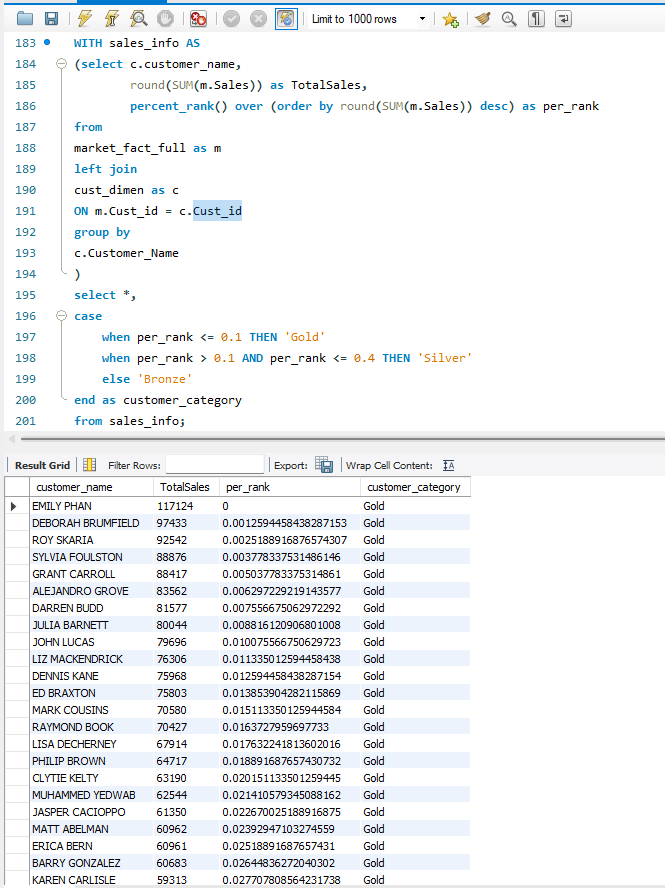


**Example**


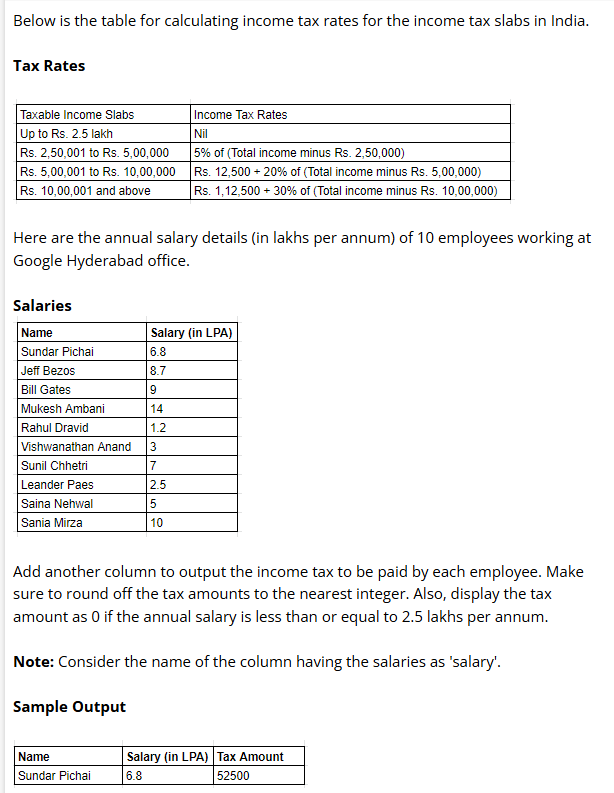

### UDF - User Defined Function


**Syntax**

DELIMITER 


    CREATE FUNCTION function_name(func_parameter1, func_parameter2, ...)
    
      RETURN datatype [characteristics]
    
    /*      func_body      */
    
      BEGIN
    
       
    
        RETURN expression;
    
    END ;
    
    
    DELIMITER ;
    
    
    
    CALL function_name;

**Example**

Convert following query to UDF function
    
    SELECT 
    	market_fact_id,
    	profit,
    	CASE
    		WHEN profit <-500 THEN 'Huge Loss'
    		WHEN profit BETWEEN -500 AND 0 THEN 'Bearable Loss'
    		WHEN profit BETWEEN 0 AND 500 THEN 'Decent Profit'
    		ELSE 'Great Profit'
    	END AS Profit_type
    FROM
    	market_fact_full

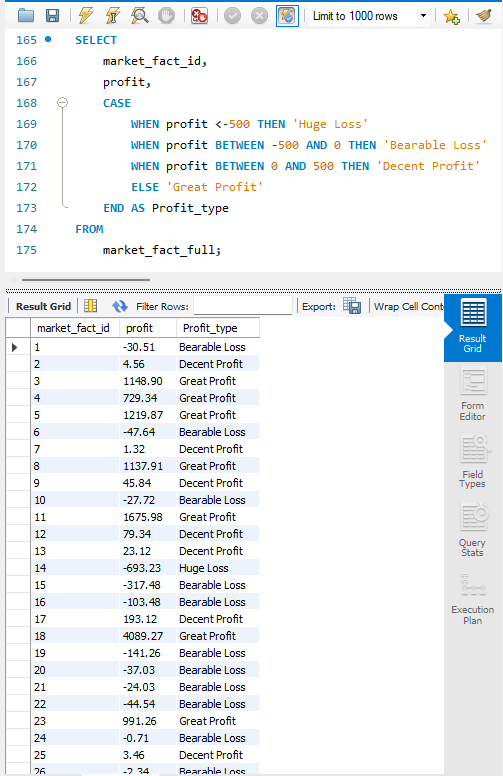


    DELIMITER $$
    
    CREATE FUNCTION profittype(profit int)
    returns varchar(40) deterministic
    
    BEGIN
    
    declare message varchar(40);
    if profit <-500 THEN 
        SET message = 'Huge Loss';
    elseif profit BETWEEN -500 AND 0 THEN
        SET message = 'Bearable Loss';
    elseif profit BETWEEN 0 AND 500 THEN 
        SET message ='Decent Profit';
    ELSE
        SET message = 'Great Profit';
    END IF;
        
    RETURN message;
    
    END;
    DELIMITER $$
    
    SELECT 
        	market_fact_id,
            profit,
        	profittype(profit)
    FROM
        	market_fact_full;

### Stored Procedure

    DELIMITER $$
        
    CREATE PROCEDURE Procedure_name ()
    
    BEGIN
       
    END$$
    
    DELIMITER ;
    
    CALL Procedure_name;

**Example**

    CREATE PROCEDURE get_sales_customer(sales_input int)
    
    BEGIN
    
    	SELECT ROUND(Sales), Cust_id
    	FROM market_star_schema.market_fact_full
    	WHERE round(Sales) > sales_input
    	ORDER BY round(Sales);
    
    END$$
    DELIMITER $$;
    
    call get_sales_customer(300);

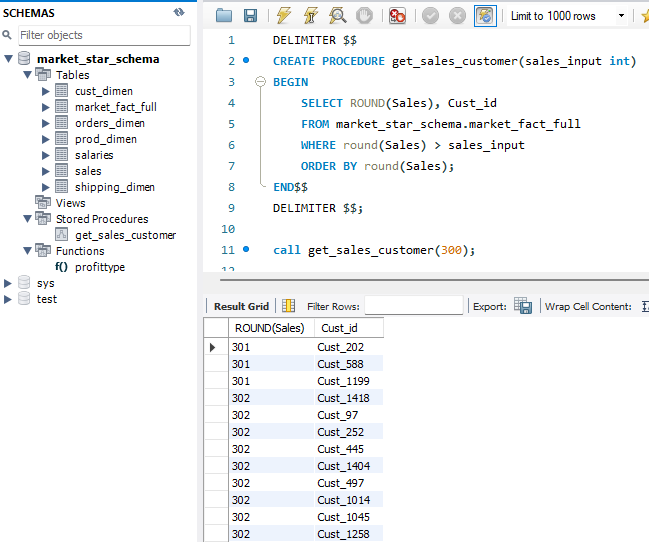

### Function Vs Stored Procedure



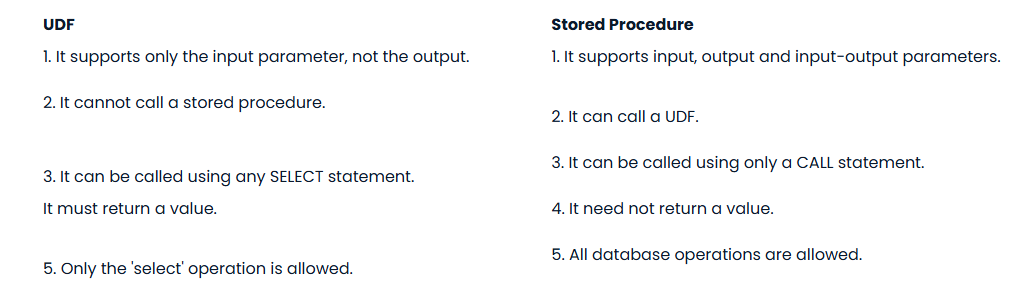


Keep in mind the above differences whenever you need to determine the right kind of stored routine to use. Now that you have learnt all about stored routines, you will learn about another concept which is used in advanced applications of SQL, which is the cursor.



### BEST PRACTICES
1. Write appropriate comments.
2. Always use table aliases when your SQL statement involves more than one
source.
3. Assign simple descriptive names to columns and tables.
4. Comment your code by using a hyphen (-) for a single line and (/* ... */) for multiple lines of code.
5. Always use table aliases when your query involves more than one source table.
6. Assign simple and descriptive names to columns and tables.
7. Write SQL keywords in upper case and the names of columns, tables and variables in lower case.
8. Always use column names in the 'order by' clause, instead of numbers.
9. Maintain the right indentation for different sections of a query.
10. Use new lines for different sections of a query.
11. Use a new line for each column name.
12. Use the SQL Formatter or the MySQL Workbench Beautification tool (Ctrl+B).

### Indexing
http://dev.mysql.com/doc/refman/8.0/en/mysql-indexes.html


The command for creating an index is as follows:



    CREATE INDEX index_name
    
    ON table_name (column_1, column_2, ...);



The command for adding an index is as follows:


    
    ALTER TABLE table_name
    
    ADD INDEX index_name(column_1, column_2, ...);



The command for dropping an index is as follows:


    
    ALTER TABLE table_name
    
    DROP INDEX index_name;



-- Index Demo

    CREATE TABLE market_fact_temp AS
    SELECT *
    FROM
    market_fact_full;
    CREATE INDEX filter_index ON market_fact_temp (cust_id, ship_id, prod_id);
    ALTER TABLE market_fact_temp DROP INDEX filter_index;

In this video, you learnt that there are two types of indices: clustered and non-clustered. The major differences between these are summarised in the table given below.



Clustered Index VS Non-Clustered Index

1. This is mostly the primary key of the table. 1. This is a combination of one or more columns of the table.
2. It is present within the table. 2. The unique list of keys is present outside the table.
3. It does not require a separate mapping. 3. The external table points to different sections of the main table. 
4. It is relatively faster. 4. It is relatively slower.


In the next segment, you will learn about the order in which the various parts of an SQL query are executed in the database engine. This will enable you to write

### Order of execution of query 

In this video, Shreyas explained one of the methods to filter the applications. In the module 'Database Design and Introduction to SQL', you learnt about the different aspects of a query, which appear in a particular order. The order in which the various SQL statements appear in a query is as follows:

    SELECT
    FROM
    [JOIN]
    WHERE
    GROUP BY
    HAVING
    WINDOW
    ORDER BY


However, the order in which the various statements are executed by the database engine is not the same.

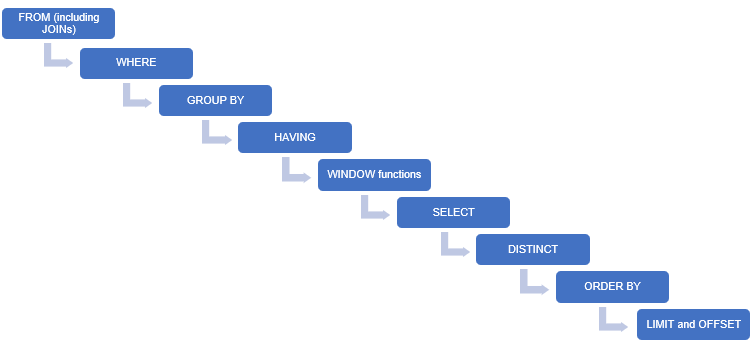

Some of the important points that you should keep in mind while writing a query are as follows:

1. Use inner joins wherever possible to avoid having any unnecessary rows in the resultant table.
2. Apply all the required filters to get only the required data values from multiple tables.
3. Index the columns that are frequently used in the WHERE clause.
4. Avoid using DISTINCT while using the GROUP BY clause, as it slows down query processing.
5. Avoid using SELECT * as much as possible. Select only the required columns.
6. Use the ORDER BY clause only if it is absolutely necessary, as it is processed late in a query.
7. Avoid using LIMIT and OFFSET as much as possible. Instead, apply appropriate filters using the WHERE clause.

example

https://www.upgrad.com/lxp/learner/player/level5/67c04e8ef4ae089e13ff9e11/676010cd62fde39221972224/6760186dc69258144e50ba58/6762772b23e869d24ff495f2/679356ea4f6f8f7dcff35fd7/678a52dcd67ac69dd7ade975


### Joins vs Nested Queries

As you learnt in this video, executing a statement with the 'join' clause creates a join index, which is an internal indexing structure. This makes it more efficient than a nested query. However, a nested query would perform better than a join while querying data from a distributed database.

In a distributed database, tables are stored in different locations instead of a local system. In this case, a nested query would perform better than a join, as we can extract relevant information from different tables located in different computers. We can then merge the values in order to obtain the desired result. In the case of a join, we would need to create a large table from the existing tables, and filtering this large table would require comparatively more time.


### Exersises

#### Problem statement 1: 

Identify the sustainable (profitable) product categories so that the growth team can capitalise on them to increase sales.

Metrics: Some of the metrics that can be used for performing the profitability analysis are as follows:

* Profits per product category
* Profits per product subcategory
* Average profit per order
* Average profit percentage per order


Tables: The tables that are required for solving this problem are as follows:

'market_fact_full'
'prod_dimen'
'orders_dimen'


The ERD for the 'market star' schema is given below for your reference.

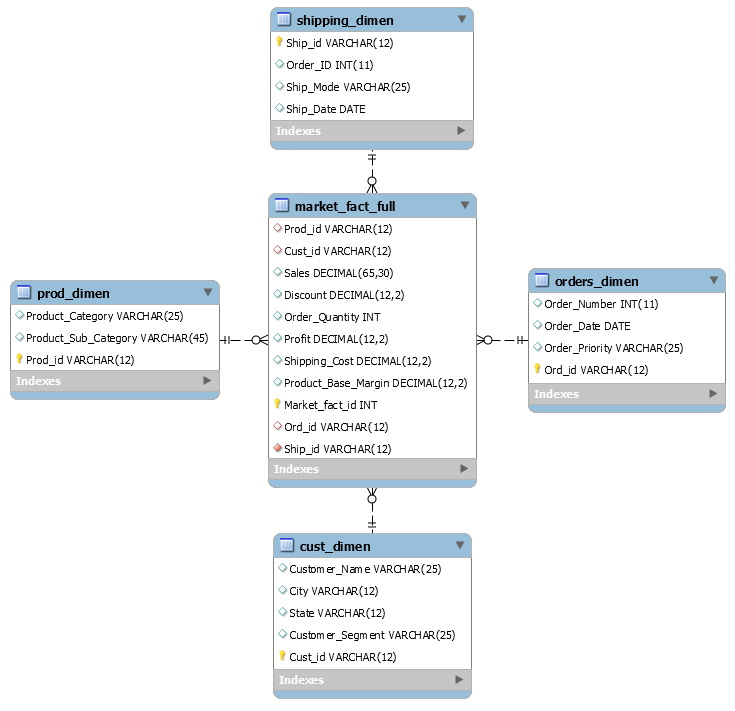



**Profits per product category**

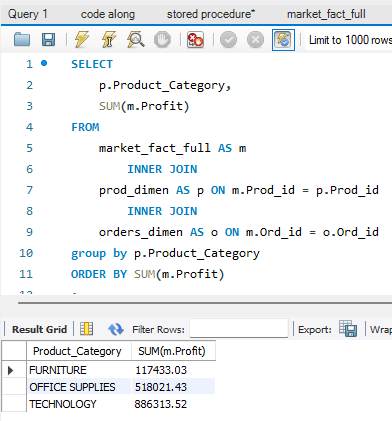

**Profits per product subcategory**

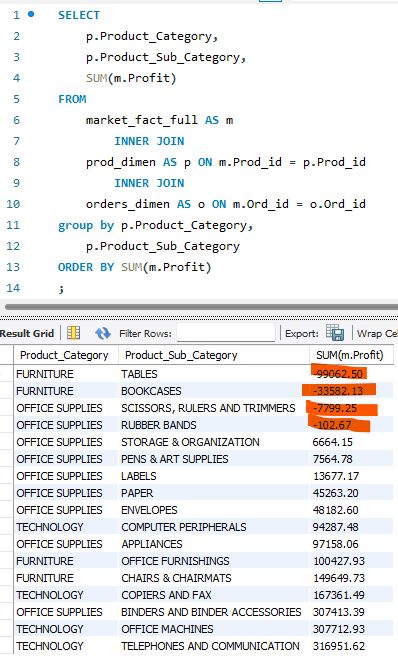

**Average profit per order**

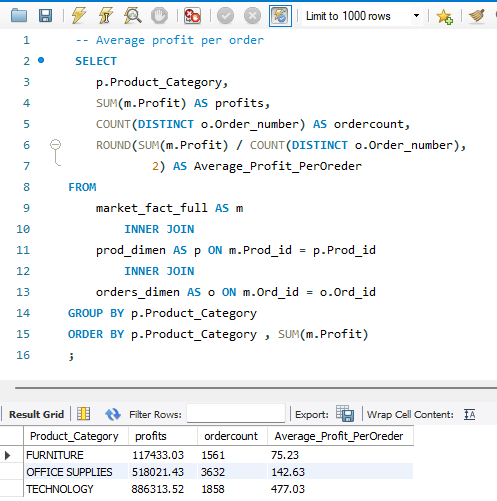

**Average profit percentage per order**

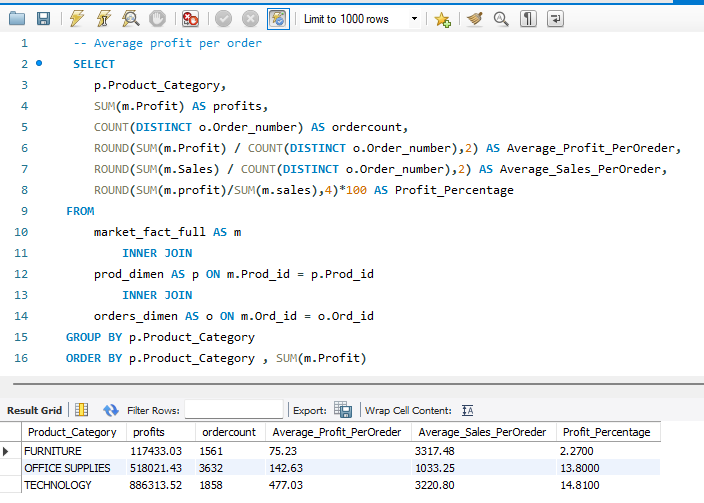


#### Problem statement 2:

**Problem statement:** Extract the details of the top ten customers in the expected output format.

**Expected output format:** The expected output format is given in the table below.

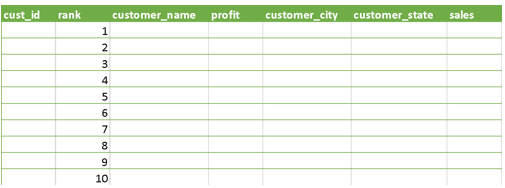

Tables: The tables that are required for solving this problem are as follows:

* 'cust_dimen'
* 'market_fact_full'


Solution:

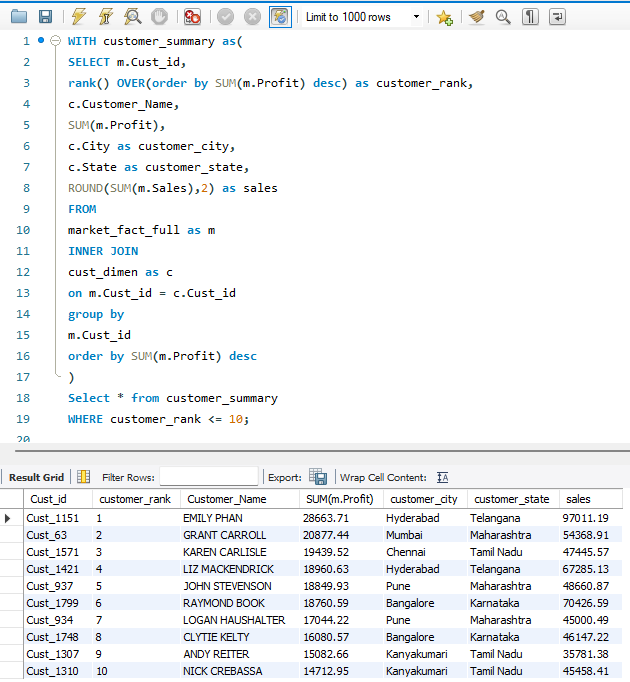

#### Problem statement 3:


**Problem statement:** Extract the required details of the customers who have not placed an order yet.



**Expected columns:** The columns that are required as the output are as follows:

* 'cust_id'
* 'cust_name'
* 'city'
* 'state'
* 'customer_segment'
  
  
A flag to indicate that there is another customer with the exact same name and city but a different customer ID.


Tables: The tables that are required for solving this problem are as follows:

* 'cust_dimen'
* 'market_fact_full'

**Solution**

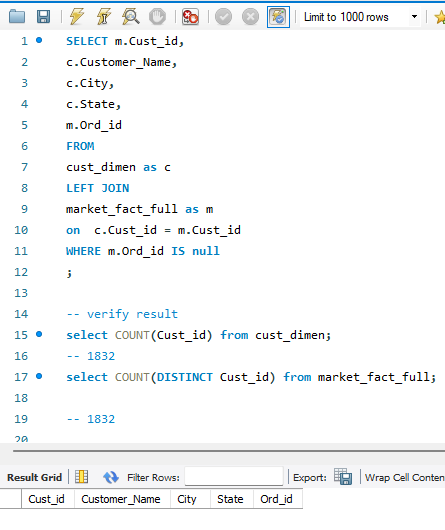


#### Problem statement 4:


**Problem statement:** Extract the required details of the customers who have  placed only 1 order yet.



**Expected columns:** The columns that are required as the output are as follows:

* 'cust_id'
* 'cust_name'
* 'city'
* 'state'
* 'customer_segment'
  
  
A flag to indicate that there is another customer with the exact same name and city but a different customer ID.


Tables: The tables that are required for solving this problem are as follows:

* 'cust_dimen'
* 'market_fact_full'

**Solution**

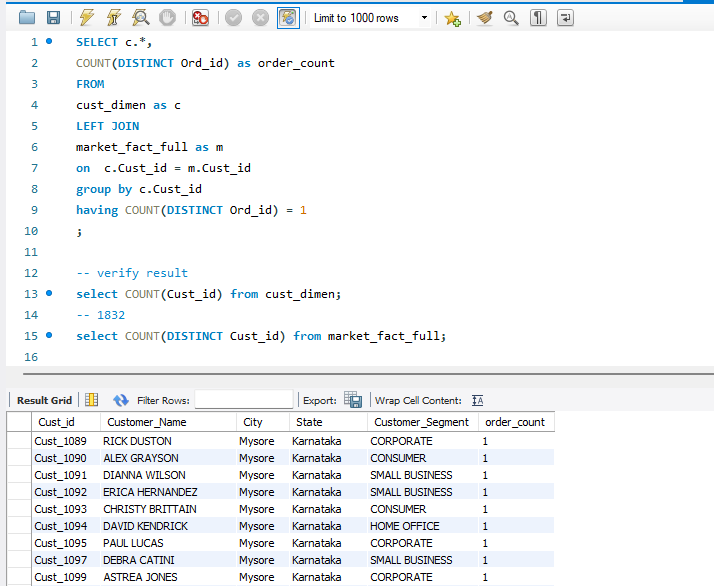

#### Problem statement 5:Fraud Detection

Fraud Detection



Suppose you are a senior manager at Domino's Pizza and your job is to manage operations in Mumbai. The company has come up with an attractive offer for new customers: each new customer who signs up can avail a discount of 75% on their first order with a maximum cap of ₹500. Everything seems to be going well in all the areas in Mumbai, except in Chembur. An unexpectedly large number of customers are signing up on a daily basis. What could be the reason for this?


**Solution**

using the previous example first we find people we have ordered more than once 

    SELECT c.*,
    COUNT(DISTINCT Ord_id) as order_count
    FROM
    cust_dimen as c
    LEFT JOIN
    market_fact_full as m
    on  c.Cust_id = m.Cust_id
    group by c.Cust_id
    having COUNT(DISTINCT Ord_id) <> 1
    ;

Then we look for Customer with Same (Name , City ) haveing duplicate Cust_id 

    select Customer_Name, City,  count(Cust_id) as customer_count from cust_dimen group by Customer_Name, city, state HAVING  count(Cust_id) > 1;


Then set the fraud flag using case statement 

    select cd.*,
    CASE 
    	WHEN fl.customer_count IS NULL 
        THEN 'FRAUD'
        ELSE 'NORMAL'
    END as fraud_flag    
    FROM
    cust_details as cd
    LEFT JOIN 
    fraud_cust_list as fl
    on cd.Customer_Name = fl.Customer_Name 
    AND cd.City = fl.city;


Final Output 

    -- fraudlunt customers 

    
    -- customers with multiple order 
    with cust_details as 
    (
    SELECT 
        c.*, COUNT(DISTINCT Ord_id) AS order_count
    FROM
        cust_dimen AS c
            LEFT JOIN
        market_fact_full AS m ON c.Cust_id = m.Cust_id
    GROUP BY c.Cust_id
    HAVING COUNT(DISTINCT Ord_id) <> 1
    ),
    -- customers with multiple order 
    
    -- look for customers who have same name but duplicate cust id
    fraud_cust_list as(
    select Customer_Name, City,  count(Cust_id) as customer_count from cust_dimen group by Customer_Name, city HAVING  count(Cust_id) > 1
    )
    -- look for customers who have same name but duplicate cust id
    
    -- set fraud flag
    select cd.*,
    CASE 
    	WHEN fl.customer_count IS NULL 
        THEN 'FRAUD'
        ELSE 'NORMAL'
    END as fraud_flag    
    FROM
    cust_details as cd
    LEFT JOIN 
    fraud_cust_list as fl
    on cd.Customer_Name = fl.Customer_Name 
    AND cd.City = fl.city;
  
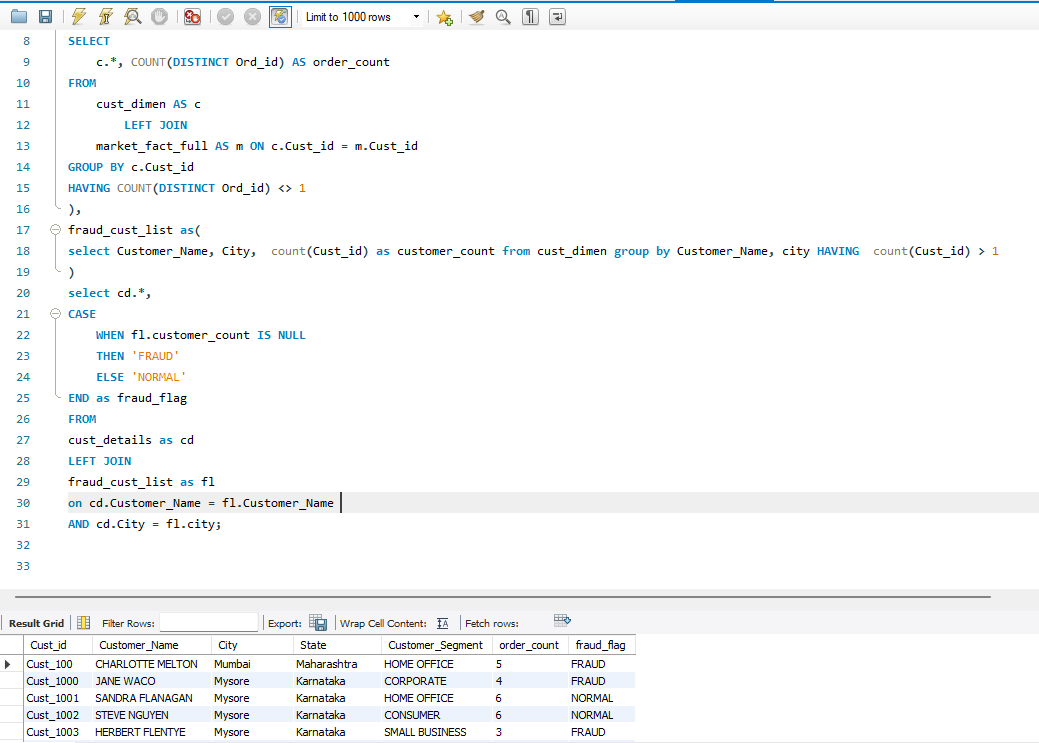

**SAKILA DB**

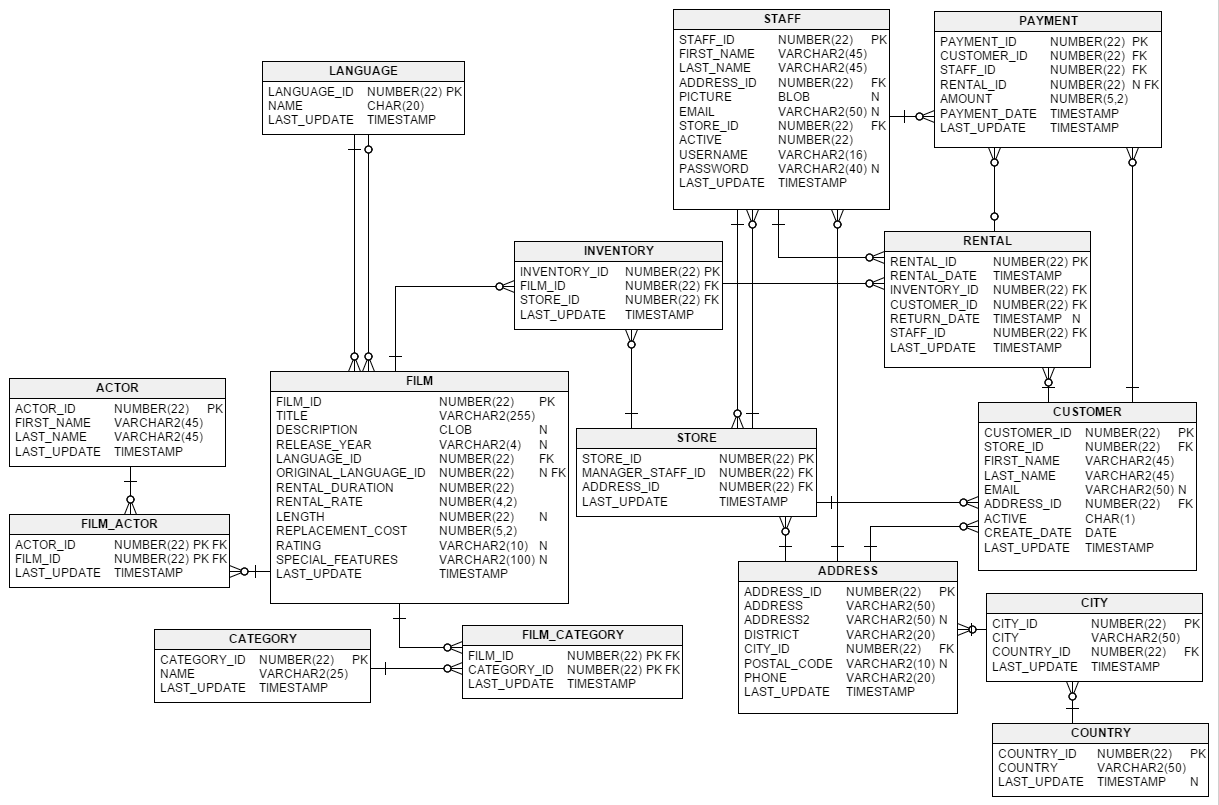

#### Problem statement 6:

Using SAKILA db Write a query to find the month number (Eg: 4 corresponds to April) in which the most number of payments were made.

Sample Output

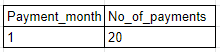

**Solution**

    --
    Use sakila DB 
    SELECT 
        MONTH(PAYMENT_DATE) AS Payment_month,
        COUNT(payment_id) AS No_of_payments
    FROM
        PAYMENT
    GROUP BY MONTH(PAYMENT_DATE)
    ORDER BY COUNT(payment_id) DESC
    LIMIT 1;


#### Problem statement 7:

Write a query to find the number of occurrences of each film_category in each city. Arrange them in the decreasing order of their category count.

Sample Output

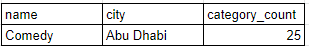


**Solution**

    use sakila;
    
    SELECT 
        name, city, COUNT(category_id) AS category_count
    FROM
        category
            INNER JOIN
        film_category USING (category_id)
            INNER JOIN
        inventory USING (film_id)
            INNER JOIN
        store USING (store_id)
            INNER JOIN
        address USING (address_id)
            INNER JOIN
        city USING (city_id)
    GROUP BY name , city
    ORDER BY category_count DESC;
    
    
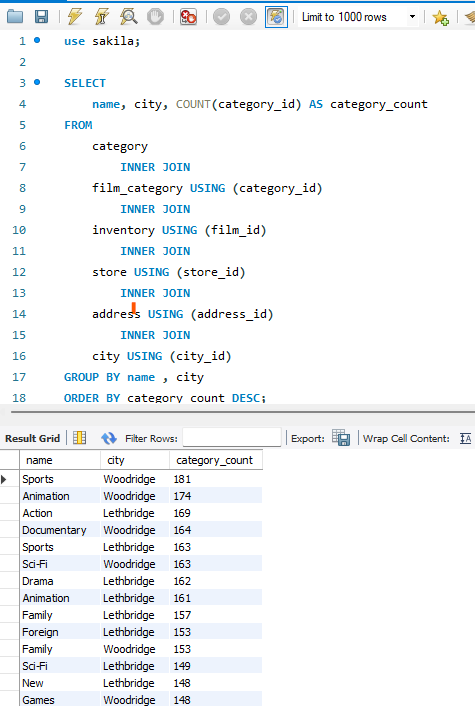


#### Problem statement 8:

Suppose you are running an advertising campaign in Canada for which you need the film_ids and titles of all the films released in Canada. List the films in the alphabetical order of their titles.



**Sample Output**

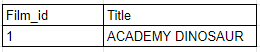

**Solution**

    SELECT 
        film_id, title
    FROM
        film
            INNER JOIN
        inventory USING (film_id)
            INNER JOIN
        store USING (store_id)
            INNER JOIN
        address USING (address_id)
            INNER JOIN
        city USING (city_id)
            INNER JOIN
        country USING (country_id)
    WHERE
        country = 'Canada'
    group by  film_id, title
    ;


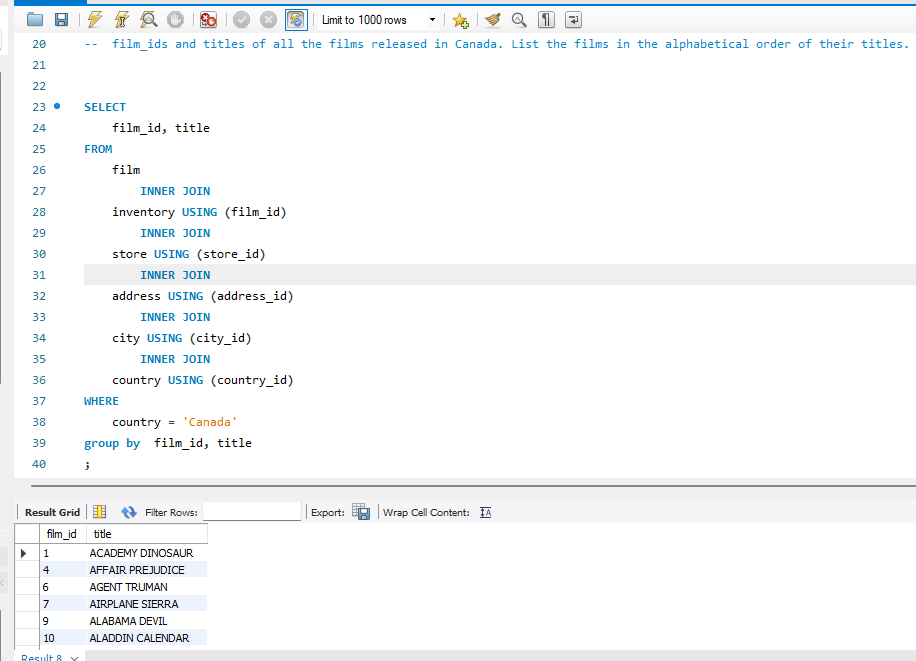


#### connecting to jupyter to mysql server

In [ ]:
#### connecting to mysql 

! pip install PyMySQL
! pip install ipython-sql
! pip install mysqlclient


In [22]:
import pymysql
import pandas as pd

host = 'localhost'
port = 3306
user = 'root'
password = 'Ujwal&1982@'
database = 'sakila'

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM film",
    conn)
df.tail(10)

C:\Users\TE416232\AppData\Local\Temp\ipykernel_12476\2757980796.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM film",


,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
990,991,WORST BANGER,A Thrilling Drama of a Madman And a Dentist wh...,2006,1,None,4,2.99,185,26.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
991,992,WRATH MILE,A Intrepid Reflection of a Technical Writer An...,2006,1,None,5,0.99,176,17.99,NC-17,"Trailers,Commentaries",2006-02-15 05:03:42
992,993,WRONG BEHAVIOR,A Emotional Saga of a Crocodile And a Sumo Wre...,2006,1,None,6,2.99,178,10.99,PG-13,"Trailers,Behind the Scenes",2006-02-15 05:03:42
993,994,WYOMING STORM,A Awe-Inspiring Panorama of a Robot And a Boat...,2006,1,None,6,4.99,100,29.99,PG-13,Deleted Scenes,2006-02-15 05:03:42
994,995,YENTL IDAHO,A Amazing Display of a Robot And a Astronaut w...,2006,1,None,5,4.99,86,11.99,R,"Trailers,Commentaries,Deleted Scenes",2006-02-15 05:03:42
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2006-02-15 05:03:42
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2006-02-15 05:03:42
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2006-02-15 05:03:42
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2006-02-15 05:03:42
999,1000,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2006-02-15 05:03:42


#### Problem statement 8:

Write a query to list all the films existing in the 'Comedy' category and arrange them in the alphabetical order.



**Sample Output**

title

ACADEMY DINOSAUR

**Solution**

    use sakila;
    
    SELECT 
        title
    FROM
        film
            INNER JOIN
        film_category USING (film_id)
            INNER JOIN
        category USING (category_id)
        where name='Comedy'
        order by title
        ;

#### Problem statement 9:

Instruction

List the first and last names of all customers whose first names start with the letters 'A', 'J' or 'T' or last names end with the substring 'on'. Arrange them alphabetically in the order of their first names.



**Sample Output**

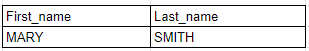

**Solution**

    SELECT 
        first_name, last_name
    FROM
        customer
    WHERE
        SUBSTRING(first_name, 1, 1) IN ('A' , 'J', 'T')
            OR last_name LIKE '%on'
    order by first_name        
    ;